In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# we can drop this ID Column
df.drop("Loan_ID",axis=1 , inplace = True)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(614, 12)

#### Here our dataset is small we can fill the null values 

In [9]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace= True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace = True)

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Now we classify the columns into numerical and categorical

In [11]:
cat_colum = df.select_dtypes("object").columns

In [12]:
for i in cat_colum:
    print(df[i].value_counts(), "\n")

Gender
Male      502
Female    112
Name: count, dtype: int64 

Married
Yes    401
No     213
Name: count, dtype: int64 

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64 

Self_Employed
No     532
Yes     82
Name: count, dtype: int64 

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64 

Loan_Status
Y    422
N    192
Name: count, dtype: int64 



#### Here we can see Dependents haing a "+" sign So we can clean it

In [13]:
df["Dependents"] = df["Dependents"].apply(lambda x: x.split("+")[0])

In [14]:
df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

##### Now we can check how these categorical columns have impact on our Loan Status

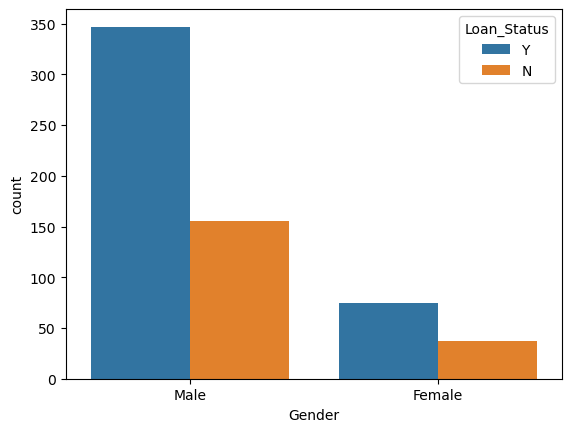

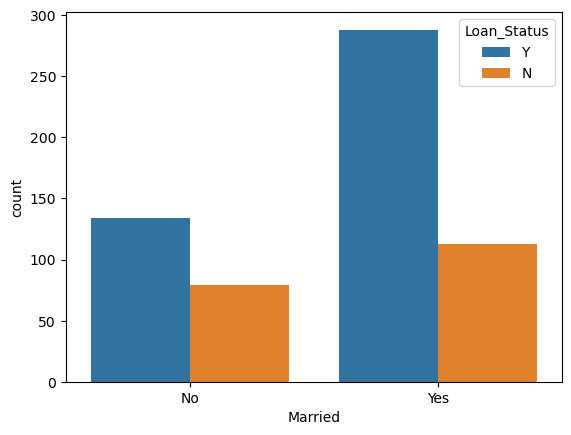

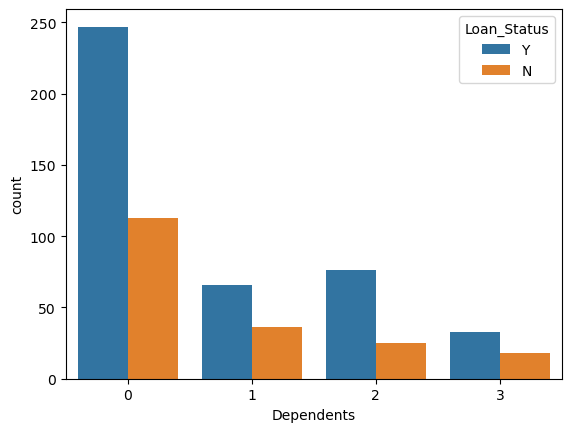

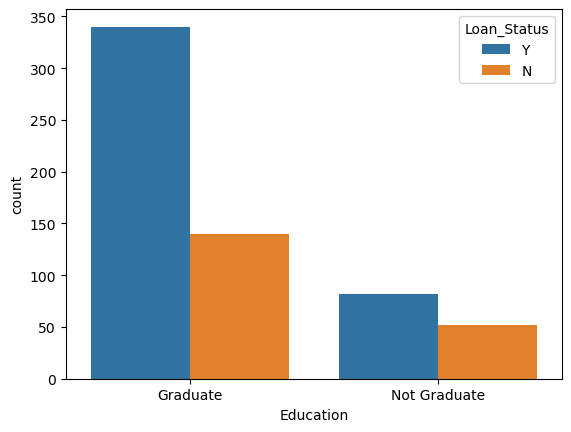

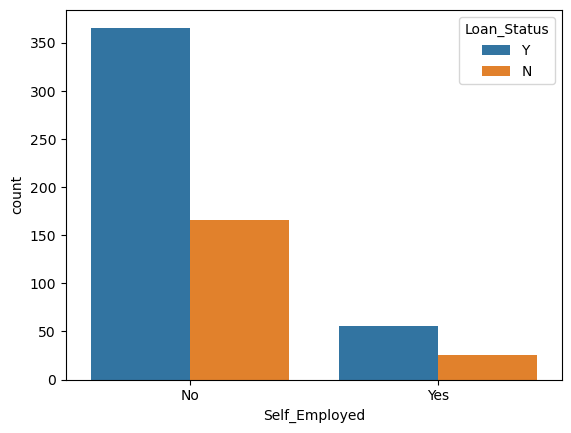

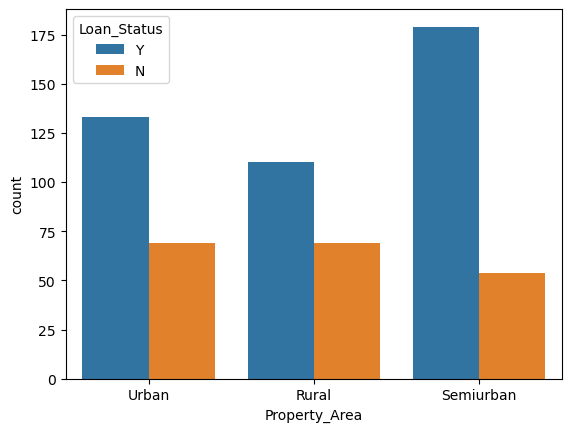

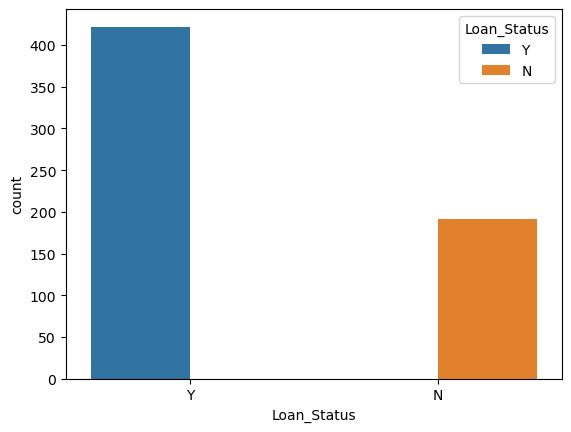

In [15]:
for colm in cat_colum:
    sns.countplot(data = df, x = colm, hue ="Loan_Status")
    plt.xlabel(colm)
    plt.show()

In [16]:
num_colm = df.select_dtypes(exclude="object").columns

In [17]:
num_colm

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [18]:
for i in num_colm:
    print(i)
    print("-------------------")
    print(df[i].describe(), "\n")

ApplicantIncome
-------------------
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64 

CoapplicantIncome
-------------------
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64 

LoanAmount
-------------------
count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64 

Loan_Amount_Term
-------------------
count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64 

Credit_History
-------------

#### Now we can check how these Numerical columns have impact on our Loan Status

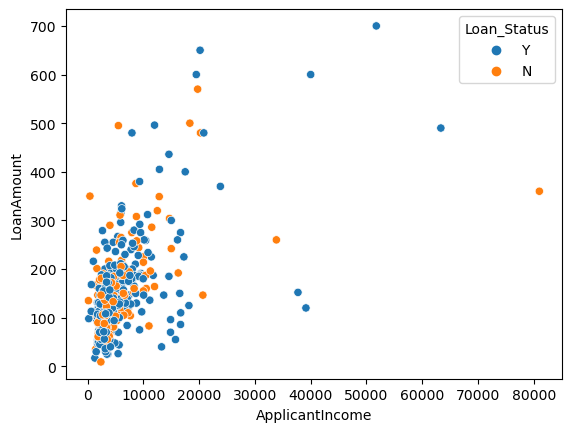

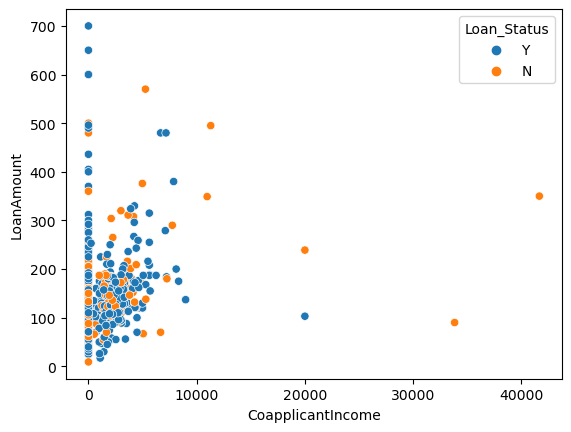

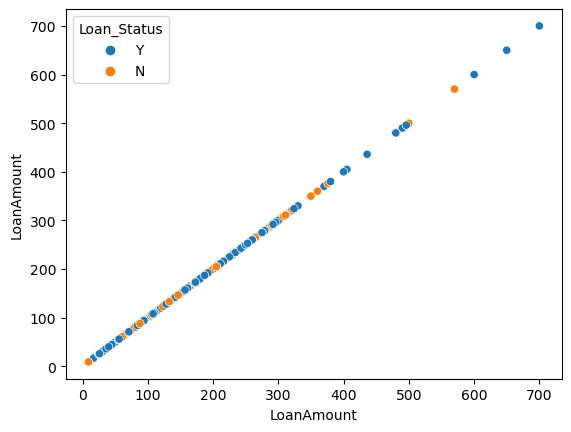

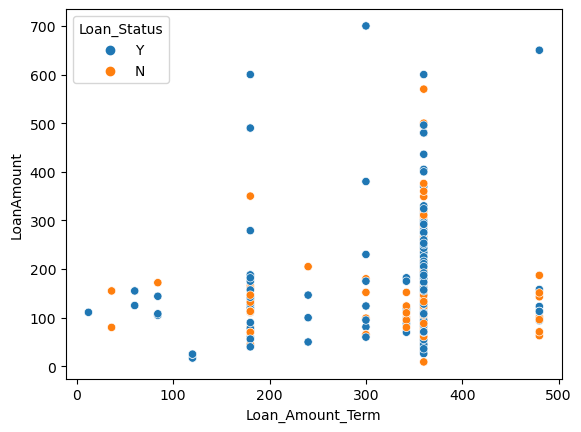

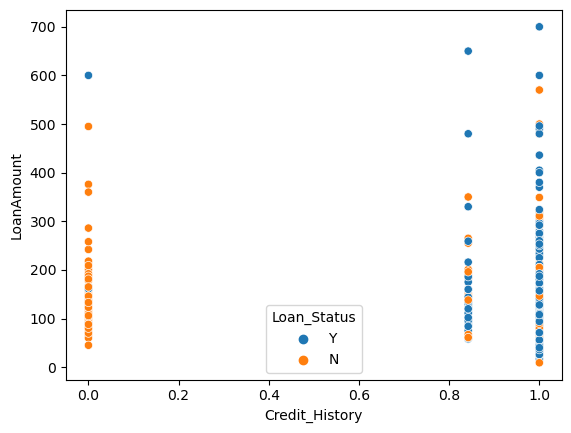

In [19]:
for colm in num_colm:
    sns.scatterplot(data = df, x = colm, y ="LoanAmount", hue = "Loan_Status")
    plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

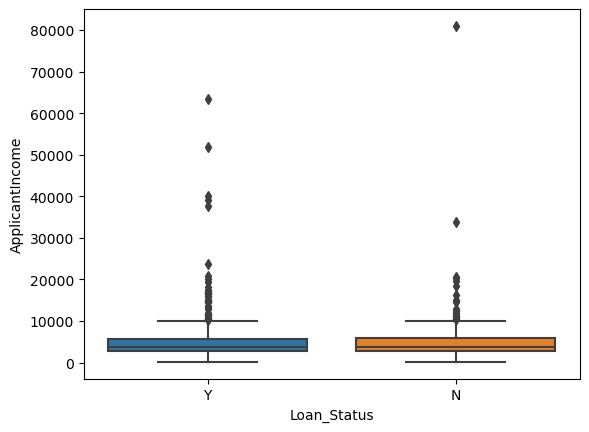

In [20]:
sns.boxplot(data = df, y= "ApplicantIncome", x= "Loan_Status")

In [21]:
# Now we can remove these outliers by removing those above 30000

df = df[~(df["ApplicantIncome"]> 30000)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

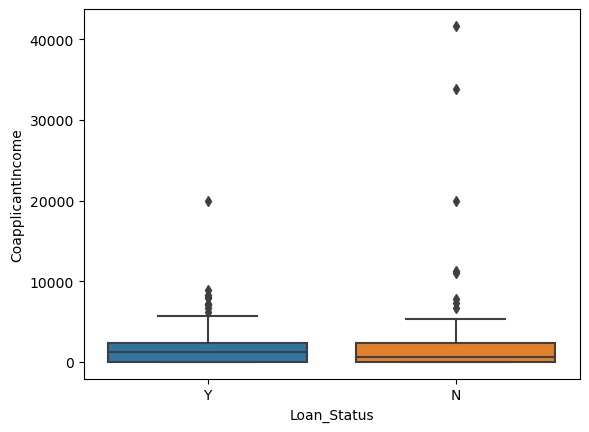

In [22]:
sns.boxplot(data = df, y= "CoapplicantIncome", x= "Loan_Status")

In [23]:
# Here we can remove those above 20000

df = df[~(df["CoapplicantIncome"]>20000)]

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


####  Now we have to encode our data into Numerical form

In [25]:
df["Gender"] = df["Gender"].replace({"Male":1 ,"Female":0})

In [26]:
df["Married"] = df["Married"].replace({"Yes":1,"No":0})

In [27]:
df["Education"] = df["Education"].replace({"Graduate":1, "Not Graduate":0})

In [28]:
df["Self_Employed"] = df["Self_Employed"].replace({"Yes":1, "No":0})

In [29]:
df["Property_Area"] = df["Property_Area"].replace({"Semiurban":0,"Urban":1, "Rural":2})

In [30]:
df["Loan_Status"] = df["Loan_Status"].replace({"Y":1,"N":0})

 #### Now we can select our input and target variables

In [31]:
X = df.drop("Loan_Status", axis =1)

In [32]:
y = df["Loan_Status"]

In [33]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [34]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 605, dtype: int64

###  Hyperparameter Tunning

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [36]:
model_params = {
    "Logistic Regression" : {
        "model" : LogisticRegression(),
        "params" : {
            "fit_intercept" : [True,False]
        }
    },
        
    "Decision Tree" :{
        "model" : DecisionTreeClassifier(),
        "params" : {
            "max_depth":[2,3,4,5]
        }
    },
    
    "Random Forest" :{
        "model" : RandomForestClassifier(),
        "params" : {
            "max_depth":[2,3,4,5]
        }     
    }
}

In [37]:
scores = []
cv = ShuffleSplit(n_splits=5,test_size= 0.2, random_state=0)
for algo_name, config in model_params.items():
    gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score= False)
    gs.fit(X,y)
    scores.append({
        "model": algo_name,
        "best score": gs.best_score_ ,
        "best params": gs.best_params_
    })

In [38]:
pd.DataFrame(scores)

,model,best score,best params
0,Logistic Regression,0.821488,{'fit_intercept': False}
1,Decision Tree,0.816529,{'max_depth': 2}
2,Random Forest,0.818182,{'max_depth': 2}


#### Cross Validation

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits=5,test_size= 0.2, random_state=0)
cross_val_score(LogisticRegression(), X,y, cv = cv)

array([0.83471074, 0.82644628, 0.80991736, 0.83471074, 0.79338843])

#### we can split our data for testing and training

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
# We can use Logistic Regression as model
model = LogisticRegression(fit_intercept=False)
model.fit(X_train,y_train)


LogisticRegression(fit_intercept=False)

#### Validation

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
cm = confusion_matrix(y_test,y_pred)

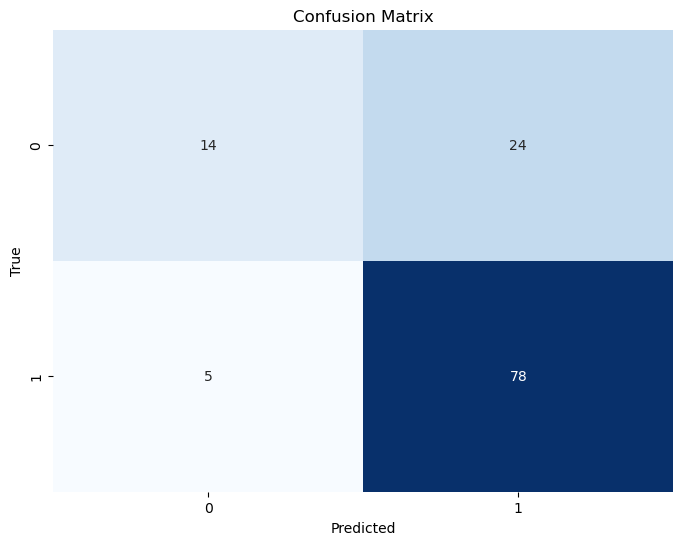

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49        38
           1       0.76      0.94      0.84        83

    accuracy                           0.76       121
   macro avg       0.75      0.65      0.67       121
weighted avg       0.76      0.76      0.73       121



In [47]:
accuracy_score(y_test, y_pred)

0.7603305785123967